<a href="https://colab.research.google.com/github/Eduardo-R-B-A/alura-store-desafio/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [21]:
# Cálculo do faturamento por loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibição dos resultados formatados
print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")




Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [22]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Contagem geral das vendas por categoria
vendas_por_categoria = lojas['Categoria do Produto'].value_counts()
print(vendas_por_categoria)

# Agrupar por loja e categoria
vendas_categoria_loja = lojas.groupby(['Loja', 'Categoria do Produto'])['Produto'].count().reset_index()

# Ordenar para facilitar a leitura
vendas_categoria_loja = vendas_categoria_loja.sort_values(['Loja', 'Produto'], ascending=[True, False])

print(vendas_categoria_loja)


Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64
      Loja   Categoria do Produto  Produto
6   Loja 1                 moveis      465
2   Loja 1            eletronicos      448
0   Loja 1             brinquedos      324
1   Loja 1       eletrodomesticos      312
3   Loja 1        esporte e lazer      284
4   Loja 1  instrumentos musicais      182
5   Loja 1                 livros      173
7   Loja 1  utilidades domesticas      171
14  Loja 2                 moveis      442
10  Loja 2            eletronicos      422
8   Loja 2             brinquedos      313
9   Loja 2       eletrodomesticos      305
11  Loja 2        esporte e lazer      275
12  Loja 2  instrumentos musicais      224
13  Loja 2                 livros      197
15  Loja 2  utilidades do

# 3. Média de Avaliação das Lojas

In [23]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

media_avaliacoes = lojas.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print(media_avaliacoes)


Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [24]:
mais_vendidos = lojas['Produto'].value_counts().head(10)
print("🔝 Produtos Mais Vendidos:")
print(mais_vendidos)

menos_vendidos = lojas['Produto'].value_counts().tail(10)
print("\n🔻 Produtos Menos Vendidos:")
print(menos_vendidos)


🔝 Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

🔻 Produtos Menos Vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Frete Médio por Loja


In [25]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

frete_medio = lojas.groupby('Loja')['Frete'].mean().sort_values()
print(frete_medio)


Loja
Loja 4    31.278997
Loja 3    33.074464
Loja 2    33.621941
Loja 1    34.691805
Name: Frete, dtype: float64


## Gráfico de Pizza Faturamento por Loja

---



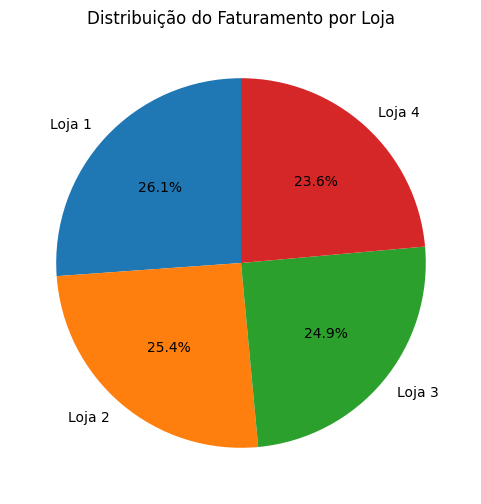

In [26]:
import matplotlib.pyplot as plt

# Dados do faturamento
faturamento_valores = [
    loja['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(6,6))
plt.pie(faturamento_valores, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição do Faturamento por Loja')
plt.show()


## Gráfico de Barras Avaliação Média por Loja
---

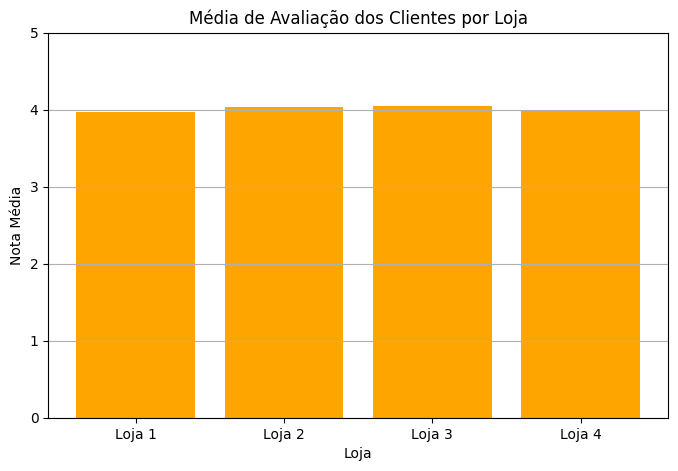

In [27]:
# Dados da avaliação
avaliacoes = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

plt.figure(figsize=(8,5))
plt.bar(avaliacoes.keys(), avaliacoes.values(), color='orange')
plt.title('Média de Avaliação dos Clientes por Loja')
plt.xlabel('Loja')
plt.ylabel('Nota Média')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.show()


## Gráfico de Linhas Frete Médio por Loja
---

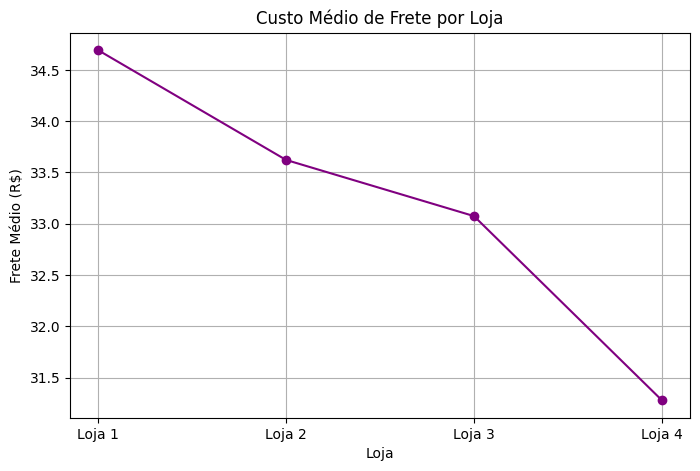

In [28]:
# Dados de frete
fretes = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

plt.figure(figsize=(8,5))
plt.plot(list(fretes.keys()), list(fretes.values()), marker='o', linestyle='-', color='purple')
plt.title('Custo Médio de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)
plt.show()


## Relatório

# 📊 Relatório Final – Análise de Desempenho das Lojas da Alura Store

## 🎯 Objetivo

Este relatório tem como finalidade apoiar o Sr. João na decisão sobre qual das quatro lojas da Alura Store deve ser vendida, com base em uma análise comparativa de desempenho. As métricas utilizadas para essa avaliação foram:

- Faturamento total por loja  
- Vendas por categoria de produto  
- Média de avaliação dos clientes  
- Produtos mais e menos vendidos  
- Custo médio de frete por loja  

Além disso, foram gerados três gráficos distintos utilizando a biblioteca `Matplotlib` para apoiar visualmente a tomada de decisão.

---

## 💰 Faturamento Total por Loja

- **Loja 1**: R$ 1.534.509,12  
- **Loja 2**: R$ 1.488.459,06  
- **Loja 3**: R$ 1.464.025,03  
- **Loja 4**: R$ 1.384.497,58

> A **Loja 4 apresentou o menor faturamento** da rede, sendo a loja com menor desempenho financeiro entre todas.

---

## 📦 Vendas por Categoria de Produto

As cinco categorias mais populares foram:

1. **Móveis** – 1.886 unidades  
2. **Eletrônicos** – 1.772 unidades  
3. **Brinquedos** – 1.290 unidades  
4. **Eletrodomésticos** – 1.149 unidades  
5. **Esporte e Lazer** – 1.113 unidades

A **Loja 4 teve o menor volume de vendas em categorias relevantes**, como eletrodomésticos, instrumentos musicais e livros, o que pode indicar menor diversidade e atratividade de produtos.

---

## ⭐ Média de Avaliação dos Clientes

- **Loja 3**: 4,05  
- **Loja 2**: 4,04  
- **Loja 4**: 4,00  
- **Loja 1**: 3,98

> Apesar da diferença ser pequena, a **Loja 1 teve a pior média de avaliação**, enquanto a **Loja 3 liderou** na satisfação do cliente.

---

## 🛍️ Produtos Mais e Menos Vendidos

### Top 3 produtos mais vendidos:
- **Cômoda** – 210 unidades  
- **Carrinho controle remoto** – 206 unidades  
- **Micro-ondas** – 206 unidades  

### Top 3 produtos menos vendidos:
- **Celular ABXY** – 157 unidades  
- **Headset** – 158 unidades  
- **Mochila** – 163 unidades  

> Os produtos de menor saída podem indicar estoque parado ou baixa demanda. Não houve concentração crítica em uma loja específica, mas vale atenção ao portfólio.

---

## 🚚 Custo Médio de Frete por Loja

- **Loja 4**: R$ 31,28  
- **Loja 3**: R$ 33,07  
- **Loja 2**: R$ 33,62  
- **Loja 1**: R$ 34,69

> A **Loja 4 possui o menor frete médio**, o que é um ponto positivo, mas **não suficiente para compensar seu fraco desempenho em outras métricas**.

---

## 📈 Gráficos Gerados

- **Gráfico de Pizza**: Distribuição do faturamento por loja  
- **Gráfico de Barras**: Média de avaliação por loja  
- **Gráfico de Linhas**: Custo médio de frete por loja  

Esses gráficos ajudaram a visualizar de forma clara as diferenças de desempenho entre as lojas.

---

## ✅ Conclusão

Com base em todas as análises realizadas, conclui-se que a **Loja 4 é a melhor candidata para ser vendida**. Ela apresenta:

- O **menor faturamento total**  
- **Desempenho abaixo da média** em categorias importantes  
- **Média de avaliação inferior** a duas concorrentes  
- Volume relativamente menor de vendas em produtos-chave  

Embora tenha o menor custo de frete, isso **não compensa seu fraco desempenho geral**, tornando-a a **melhor opção para desinvestimento estratégico**.


